### Answers to Assignment 2 of 230Q

##### Authors(alphabetic order)
1) Ishan Pathak ishan_pathak@berkeley.edu
2) Leonid Maksymenko leo.maksymenko@berkeley.edu
3) Nymph Qiu nymph_qiu@berkeley.edu
4) Xuanzhong Ren rxz19@berkeley.edu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Q1

(a)

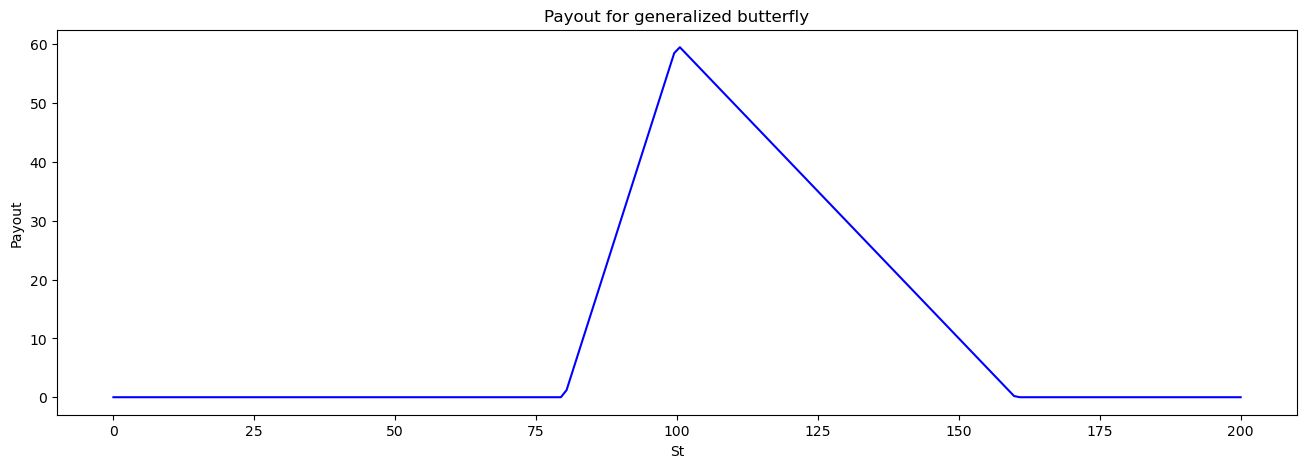

In [16]:
import numpy as np

st = np.linspace(0, 200, 200)
def payoff_func(s, K1, K2, K3, L):
    if s < K1:
        return 0
    elif s >= K1 and s < K2:
        return (s-K1)*L/(K2-K1)
    elif s >= K2 and s < K3:
        return (s-K1)*L/(K2-K1) - (s-K2)*(L/(K2-K1)+L/(K3-K2))
    else:
        return (s-K1)*L/(K2-K1) - (s-K2)*(L/(K2-K1)+L/(K3-K2)) + (s-K3)*L/(K3-K2)
            
payoff = [payoff_func(s, 80, 100, 160, 60) for s in st]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
axes.plot(st, payoff, color ='blue')
axes.set_xlabel("St")
axes.set_ylabel("Payout")
axes.set_title("Payout for generalized butterfly")
plt.show()

(b)

$\mathbf{h}=\begin{pmatrix}
\frac{L}{K_2-K_1} \\
-\frac{L}{K_2-K_1}-\frac{L}{K_3-K_2} \\
\frac{L}{K_3-K_2}
\end{pmatrix}$

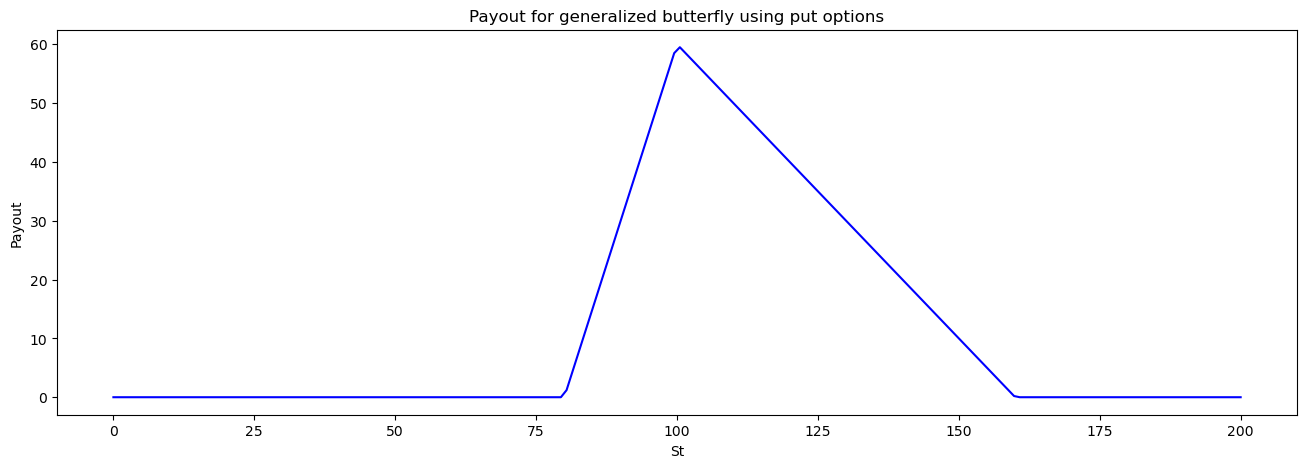

In [25]:
st = np.linspace(0, 200, 200)
def payoff_func_put(s, K1, K2, K3, L):
    if s < K1:
        return (K1-s)*L/(K2-K1) - (K2-s)*(L/(K2-K1)+L/(K3-K2)) + (K3-s)*L/(K3-K2)
    elif s >= K1 and s < K2:
        return - (K2-s)*(L/(K2-K1)+L/(K3-K2)) + (K3-s)*L/(K3-K2)
    elif s >= K2 and s < K3:
        return (K3-s)*L/(K3-K2)
    else:
        return 0
            
payoff = [payoff_func_put(s, 80, 100, 160, 60) for s in st]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,5))
axes.plot(st, payoff, color ='blue')
axes.set_xlabel("St")
axes.set_ylabel("Payout")
axes.set_title("Payout for generalized butterfly using put options")
plt.show()

(c)

According to Put Call Parity
$$P_t^{Euro,K_1,T} + S_t = C_t^{Euro,K_1,T} + K_1$$
$$P_t^{Euro,K_2,T} + S_t = C_t^{Euro,K_2,T} + K_2$$
$$P_t^{Euro,K_3,T} + S_t = C_t^{Euro,K_3,T} + K_3$$
$\frac{L}{K2-K1}C_t^{Euro,K_1,T}-(\frac{L}{K2-K1}+\frac{L}{K3-K2})C_t^{Euro,K_2,T}+\frac{L}{K3-K2}C_t^{Euro,K_3,T}$<br>
$=\frac{L}{K2-K1}(P_t^{Euro,K_1,T} + S_t-K_1)$<br>
$-(\frac{L}{K2-K1}+\frac{L}{K3-K2})(P_t^{Euro,K_2,T} + S_t-K_2)+\frac{L}{K3-K2}(P_t^{Euro,K_3,T} + S_t-K_3)$<br>
$=\frac{L}{K2-K1}P_t^{Euro,K_1,T}-(\frac{L}{K2-K1}+\frac{L}{K3-K2})P_t^{Euro,K_2,T}+\frac{L}{K3-K2}P_t^{Euro,K_3,T}$<br>
$-K_1\frac{L}{K2-K1}+(\frac{L}{K2-K1}+\frac{L}{K3-K2})K_2-\frac{L}{K3-K2}K_3$<br>
$=\frac{L}{K2-K1}P_t^{Euro,K_1,T}-(\frac{L}{K2-K1}+\frac{L}{K3-K2})P_t^{Euro,K_2,T}+\frac{L}{K3-K2}P_t^{Euro,K_3,T}$<br>
The equation in (b) is verified.

### Q2

(a)<br>
The market is not complete. We could see that the rank of states $\mathbf{D}=\begin{pmatrix}120 & 105 & 100\\105 & 105 & 105\end{pmatrix} \le 2$ while we have 3 states. 

(b)<br>
$$120AD_{\uparrow}+105AD_{\rightarrow}+100AD_{\downarrow}=105$$
$$105AD_{\uparrow}+105AD_{\rightarrow}+105AD_{\downarrow}=100$$
$$AD_{\rightarrow} = \frac{13}{21}-\frac{4}{3}AD_{\downarrow}$$
$$AD_{\uparrow} = \frac{7}{21}+\frac{1}{3}AD_{\downarrow}$$

(c)<br>
$$AD_{\rightarrow} = \frac{13}{21}-\frac{4}{3}AD_{\downarrow} > 0 \implies AD_{\downarrow} < \frac{13}{28}$$
$$AD_{\uparrow} = \frac{7}{21}+\frac{1}{3}AD_{\downarrow} > 0 \implies AD_{\downarrow} > -1$$
$$AD_{\downarrow} > 0$$
We could see that above as long as $0 < AD_{\downarrow} < \frac{13}{28}$ there exists a strict positive vector. According to FTAP, there is no arbitrage.

(d)<br>

Let $AD_{\downarrow} = x$
$$q_{\uparrow} = \frac{\frac{7}{21}+\frac{1}{3}x}{\frac{20}{21}}$$
$$q_{\rightarrow} = \frac{\frac{13}{21}-\frac{4}{3}x}{\frac{20}{21}}$$
$$q_{\downarrow} = \frac{x}{\frac{20}{21}}$$
$$C_0=\frac{15q_{\uparrow}}{1.05}$$
Given arbitrage free, $0 < x < \frac{13}{28}$, so the value for call option @K=105 is $5 < C_0 < 7.3214$

(e)

$$C_0=\frac{20q_{\uparrow}+5q_{\rightarrow}}{1.05}=\frac{\frac{205}{20}}{1.05}$$
Call option @K=100 is $C_0=9.7619$. It is independent of risk-neutral probability.

### 3
#### (a)

Denote p as the risk neutral prob that the stock will rise, we have:
$$u*p+d*(1-p)=1+r$$
$$p=\frac{1+r-d}{u-d}$$
$$p=\frac{1}{2}$$
$V_{ij}$ denote the $j^{th}$ condition in the $i^{th}$ period, we have:
$$V_{21}=100*1.2^2-95=49$$
$$V_{22}=100*1.2*0.9-95=13$$
$$V_{23}=max(100*0.9*0.9-95,0)=0$$
$$V_{11}=\frac{49*0.5+13*0.5}{1.05}=29.52$$
$$V_{12}=\frac{13*0.5+0*0.5}{1.05}=6.19$$
$$V_{00}=\frac{29.52*0.5+6.19*0.5}{1.05}=17.01$$
At $t_u$:
$$\Delta=\frac{V_{21}-V_{22}}{(u-d)*S}=\frac{49-13}{(1.2-0.9)*120}=1$$
$$B=\frac{u*V_{22}-d*V_{21}}{(u-d)*B}=\frac{1.2*13-0.9*49}{(1.2-0.9)*105}=-0.90$$
At $t_d$:
$$\Delta=\frac{V_{22}-V_{23}}{(u-d)*S}=\frac{13-0}{(1.2-0.9)*90}=0.48$$
$$B=\frac{u*V_{23}-d*V_{22}}{(u-d)*B}=\frac{1.2*0-0.9*13}{(1.2-0.9)*105}=-0.37$$


#### (b)
 $$V_{00}=\frac{u^2*V_{21}+2*u*d*V_{22}+d^2*V_{23}}{(1+r)^2}$$
$$=\frac{0.5^2*49+2*0.5*0.5*13+0.5^2*0}{(1+0.05)^2}=17.01$$
#### (c)
Denote p as the risk neutral prob that the stock will rise, we have:
$$u*p+d*(1-p)=1+r$$
$$p=\frac{1+r-d}{u-d}$$
$$p=\frac{1}{2}$$
$P_{ij}$ denote the $j^{th}$ condition in the $i^{th}$ period, we have:
$$P_{21}=max(110-100*1.2^2,0)=0$$
$$P_{22}=110-100*1.2*0.9=2$$
$$P_{23}=110-100*0.9*0.9=29$$
$$P_{11}=max(110-120,\frac{0*0.5+2*0.5}{1.05})=0.95$$
$$P_{12}=max(110-90,\frac{2*0.5+29*0.5}{1.05})=20$$
$$P_{00}=max(110-100,\frac{0.95*0.5+20*0.5}{1.05})=10$$
#### (d)
Now:
strategy1: Exercise Option:$$S(t)-K$$
strategy2: Sell a stock and lend cash K:$$S(t)-K$$
Tomorrow:
strategy1: Proceeds from savings:$$(S(t)-K)(1+R_F)$$
strategy2: Proceeds from lending and savings, and close the selling position<br>
$if\,S(T)>K$:$$S(t)(1+R_F)+K(1+R_F)-K>(S(t)-K)(1+R_F)$$
$if\,S(T)<=K$:$$S(t)(1+R_F)+K(1+R_F)-S(T)>(S(t)-K)(1+R_F)$$
### 4
#### (a)
$$p_{HH}=0.6*0.7=0.42,p_{HT}=0.6*0.3-0.18,p_{TH}=0.4*0.5=0.2,p_{TT}=0.4*0.5=0.2$$
$$E_0[\tilde{x_2}]=0.42*100+0.18*80+0.2*60+0.2*40=76.4$$
#### (b)
$$p_{HH}=0.7,p_{HT}=0.3$$
$$E_H[\tilde{x_2}]=0.7*100+0.3*80=94
#### (c)
$$p_{TH}=0.5,p_{TT}=0.5$$
$$E_T[\tilde{x_2}]=0.5*60+0.5*40=50
#### (d)
$$p_{H}=0.6,p_{T}=0.4$$
$$E_0[E_1[\tilde{x_2}]]=0.6*94+0.4*50=76.4$$
#### (e)
$$E_0[E_1[\tilde{x_2}]]=\sum_{\omega_1}\pi(\omega_1)\sum_{\omega_2}\pi(\omega_2|\omega_1)x_2(\omega_1,\omega_2)$$
$$=\sum_{\omega_1}\sum_{\omega_2}\pi(\omega_1,\omega_2)x_2(\omega_1,\omega_2)$$
$$=\sum_{\omega_1,\omega_2}\pi(\omega_1,\omega_2)x_2(\omega_1,\omega_2)=E_0[\tilde{x_2}]$$